In [68]:
#import all required libraries

#library to set the working directory
import os

#Libraries for dataprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import random as rd
#libraries for data transformations
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans

#library for train test spliting
from sklearn.model_selection import train_test_split

#library for the decision tree model
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,accuracy_score,recall_score

#library for the PCA
from sklearn.decomposition import PCA

#library to improve the model performance 
from sklearn.model_selection import GridSearchCV

#library to perform data visualizations
import matplotlib.pyplot as plt
#from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics


#Library for the Average precison score
from sklearn.metrics import average_precision_score

from sklearn import svm, datasets

#Library for the Roc and AUC curve 
from sklearn.metrics import roc_auc_score,r2_score

#LIbrary for the Logistic Regression
from sklearn.linear_model import LogisticRegression

#SVM
from sklearn.svm import LinearSVC,SVC,LinearSVR

In [69]:
#set current working directory to the dataset location
os.chdir("/Users/LENOVO/Desktop/Main/Ineuron/projects/Datasets")

In [70]:
#read the input file and do some data preprocessing
data= pd.read_csv("Customer personality analysis.csv")

In [71]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [72]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [73]:
#Data Exploratin:
#DatasetInfo
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

<AxesSubplot:>

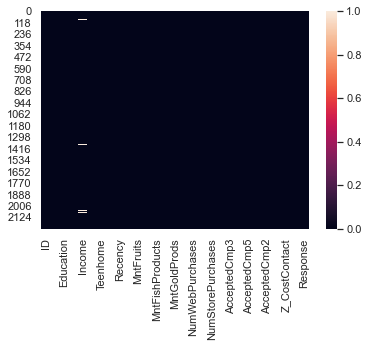

In [74]:
 #checking for the null values 
sns.heatmap(data.isnull())

In [75]:
#Counting the no of Null values  in the Income column
data.Income.isnull().count()

2240

<AxesSubplot:>

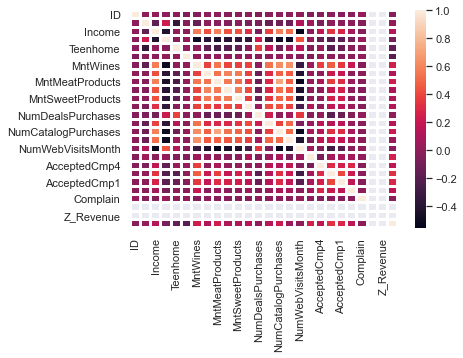

In [76]:
#Viewing the heatmap for correlation Matrix
sns.heatmap(data.corr(),linewidths=2)

In [77]:
print("The percenatge of Null values in the Data set")
(data.isnull().sum()/len(data))*100

The percenatge of Null values in the Data set


ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [78]:
#Dropping the NA values as the no of Na values are very less
#To remove the NA values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


In [79]:
#To convert the birth date of the customer into Age
data['Age']=2015-data["Year_Birth"]

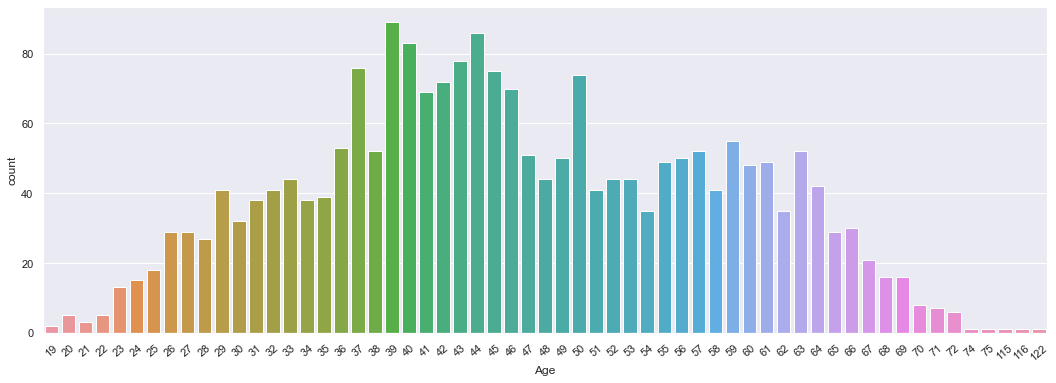

In [80]:
#
plt.figure(figsize=(18,6))
sns.set_theme(style = 'darkgrid')
sns.countplot(x = 'Age', data = data)
plt.xticks(rotation=40)
plt.show()

In [81]:
#Viewing the grouped by education column
data[['Education']].value_counts()

Education 
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
dtype: int64

In [82]:
##we can see that the Most no of people in te Data list are Graduated ad least have the Baisc educaion .

In [83]:
# This graph shows that, majority of customers are Graduated customers
data['Education'].value_counts()
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=data['Education'].value_counts().index, values=data['Education'].value_counts().values)])
fig.update_layout(height=400, width=500, title_text="Pie chart showing Education Background")
fig.show()

In [84]:
data[['Marital_Status']].value_counts()

Marital_Status
Married           857
Together          573
Single            471
Divorced          232
Widow              76
Alone               3
Absurd              2
YOLO                2
dtype: int64

In [85]:
data['Marital_Status'].value_counts()
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=data['Marital_Status'].value_counts().index, values=data['Marital_Status'].value_counts().values)])
fig.update_layout(height=400, width=500, title_text="Pie chart showing Marital Status")
fig.show()

In [86]:
data['Education'].value_counts()
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=data['Education'].value_counts().index, values=data['Education'].value_counts().values)])
fig.update_layout(height=400, width=500, title_text="Pie chart showing Education")
fig.show()

Text(0.5, 1.0, 'Income According to Education')

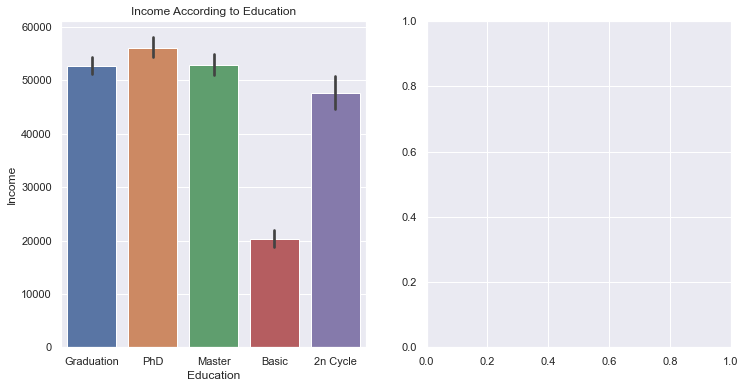

In [87]:
#Icome vs Education 
fig, (ax0, ax1 )= plt.subplots(1,2 , figsize=(12,6))
_= sns.barplot(x = 'Education', y = 'Income', data = data, ax = ax0)
ax0.set_title('Income According to Education')

## data visulation on the Products and their total sales and their distribution.


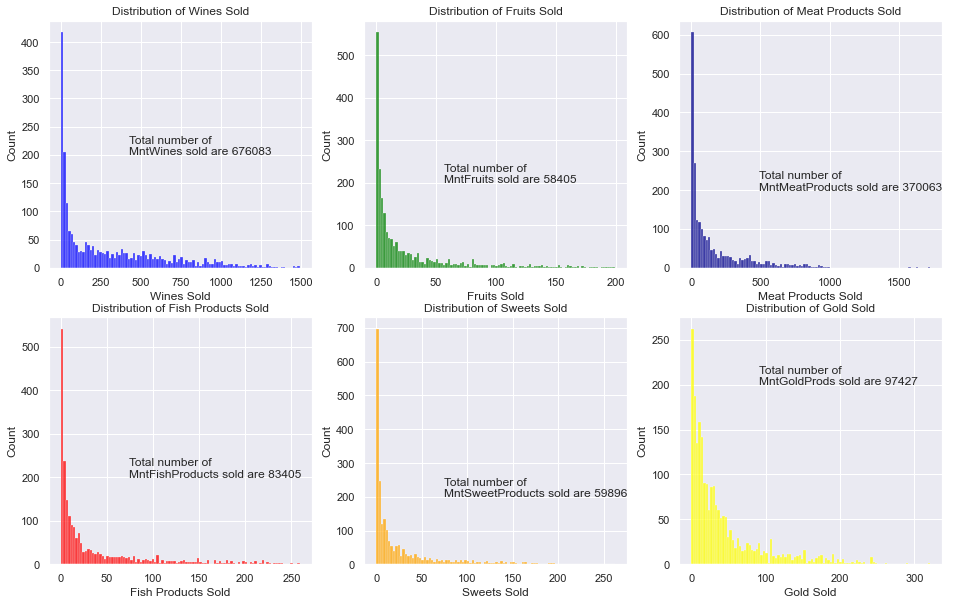

In [88]:
colmns = ['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts','MntGoldProds']
title = ['Wines Sold', 'Fruits Sold', 'Meat Products Sold', 'Fish Products Sold', 'Sweets Sold', 'Gold Sold']
color = ['blue', 'green', 'darkblue','red','orange','yellow']

fig, ax = plt.subplots(2,3, figsize=(16,10))
for i in range(len(colmns)):
    sns.histplot(data[colmns[i]], bins= 100, ax = ax[i//3, i%3],color=color[i])
    ax[i//3, i%3].set_title('Distribution of ' + title[i])
    ax[i//3, i%3].set_xlabel(title[i])
    ax[i//3, i%3].text(s = f"Total number of \n{colmns[i]} sold are {data[colmns[i]].sum()} ",
                       x = data[colmns[i]].max()/3.5, y = 200)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

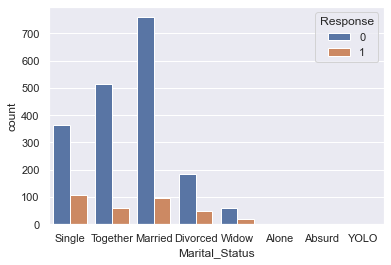

In [89]:
#Realtion b/w marital status and Response(Customer accepted the offer)
sns.countplot(x="Marital_Status",hue="Response",data=data)

<AxesSubplot:xlabel='Education', ylabel='count'>

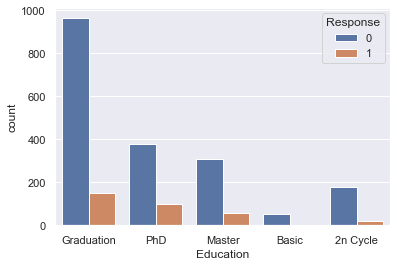

In [90]:
#Realtion b/w Education and Response(Customer accepted the offer)
sns.countplot(x="Education",hue="Response",data=data)

In [91]:
#Getting the Oldest and most recent Customer:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


<AxesSubplot:xlabel='Age', ylabel='Count'>

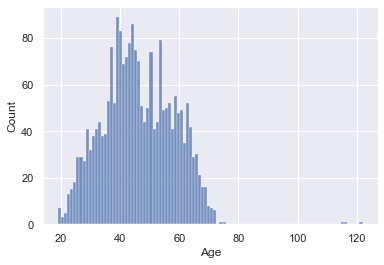

In [92]:
#Lets remove the Outliers from the Age :As we see thee are people in the dataset who are more than 100 years Old 
sns.histplot(data.Age,bins=100)

In [93]:
#so we wil find the boundary values in the Age 
Max_age=data.Age.mean()+3*data.Age.std()
Min_age=data.Age.mean()-3*data.Age.std()
print("The Boundary values of the Age Column is :", Max_age, Min_age)

The Boundary values of the Age Column is : 82.13626518014377 10.22294059602951


In [94]:
# Removing outliers in income
from scipy import stats

data = data[(np.abs(stats.zscore(data['Age'])) < 3)]     # Remove observation with more than 3 in Standard Desviation
data.reset_index(inplace=True)                          # Reset index
data = data.drop(columns=['index'])   

In [95]:
age_data = data.groupby(by = ['Age']).agg({'Income':'mean'}).reset_index()

fig = px.bar(age_data, x = 'Age', y = 'Income')
fig.update_layout(height=400, width=700, title_text="Age Vs Average Income")
fig.show()

In [96]:
age_data = data.groupby(by = ['Age']).agg({'MntWines':'mean'}).reset_index()

fig = px.bar(age_data, x = 'Age', y = 'MntWines')
fig.update_layout(height=400, width=700, title_text="Age Vs Average Income")
fig.show()

In [97]:
#Dropping the outliers by setting a cap on Age 
data = data[(data["Age"]<90)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2213


In [98]:
#Adding New Varibales for total Kids and Total Expenses 
data['Kids'] = data['Kidhome'] + data['Teenhome']
data['Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [99]:
#Getting the total No of categorical features:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    572
Single      470
Divorced    231
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: Education, dtype: int64


In [100]:
# for marital stats we see to maany dimensions so we will rduce this deimensions

In [101]:
# Renaming categories
data['Marital_Status'] = data['Marital_Status'].str.replace('Married', 'Together')
data['Marital_Status'] = data['Marital_Status'].str.replace('Together', 'Together')
data['Marital_Status'] =data['Marital_Status'].str.replace('Divorced', 'Single')
data['Marital_Status'] = data['Marital_Status'].str.replace('Widow', 'Single')
data['Marital_Status'] = data['Marital_Status'].str.replace('Absurd', 'Single')
data['Marital_Status'] =data['Marital_Status'].str.replace('Alone', 'Single')
data['Marital_Status'] =data['Marital_Status'].str.replace('YOLO', 'Single')

In [102]:
# Renaming categories
data['Education'] = data['Education'].str.replace('Basic', 'Undergraduate')
data['Education'] = data['Education'].str.replace('2n Cycle', 'Undergraduate')
data['Education'] =data['Education'].str.replace('Graduation', 'Graduate')
data['Education'] = data['Education'].str.replace('Master', 'Postgraduate')
data['Education'] = data['Education'].str.replace('PhD', 'Postgraduate')


In [103]:
# How long the customer has been added
data['Dt_Customer'] = pd.to_datetime(data.Dt_Customer)
data['Date_Collected'] = '01-01-2015'
data['Date_Collected'] = pd.to_datetime(data.Date_Collected)
data['Time_Enrolled_Days'] = (data['Date_Collected'] - data['Dt_Customer']).dt.days

In [104]:
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Kids,Expenses,Date_Collected,Time_Enrolled_Days
0,5524,1957,Graduate,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,3,11,1,58,0,1617,2015-01-01,997
1,2174,1954,Graduate,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,3,11,0,61,2,27,2015-01-01,151
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,50,0,776,2015-01-01,498
3,6182,1984,Graduate,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,3,11,0,31,1,53,2015-01-01,91
4,5324,1981,Postgraduate,Together,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,34,1,422,2015-01-01,347


In [105]:
#  Reducing the  features by removing the unwanted columns as some of the columns have been added with one anotther 
data = data.drop(columns=[
       'ID', 'Dt_Customer', 'Kidhome', 'Teenhome', 'Z_CostContact', 'Z_Revenue', 'Response', 'Date_Collected'
       ])

In [106]:
data.head(5)

,Year_Birth,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Kids,Expenses,Time_Enrolled_Days
0,1957,Graduate,Single,58138.0,58,635,88,546,172,88,...,0,0,0,0,0,0,58,0,1617,997
1,1954,Graduate,Single,46344.0,38,11,1,6,2,1,...,0,0,0,0,0,0,61,2,27,151
2,1965,Graduate,Together,71613.0,26,426,49,127,111,21,...,0,0,0,0,0,0,50,0,776,498
3,1984,Graduate,Together,26646.0,26,11,4,20,10,3,...,0,0,0,0,0,0,31,1,53,91
4,1981,Postgraduate,Together,58293.0,94,173,43,118,46,27,...,0,0,0,0,0,0,34,1,422,347


In [107]:
#Renaming some columns 
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits",
                          "MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})


In [108]:
data.head(5)

,Year_Birth,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,Kids,Expenses,Time_Enrolled_Days
0,1957,Graduate,Single,58138.0,58,635,88,546,172,88,...,0,0,0,0,0,0,58,0,1617,997
1,1954,Graduate,Single,46344.0,38,11,1,6,2,1,...,0,0,0,0,0,0,61,2,27,151
2,1965,Graduate,Together,71613.0,26,426,49,127,111,21,...,0,0,0,0,0,0,50,0,776,498
3,1984,Graduate,Together,26646.0,26,11,4,20,10,3,...,0,0,0,0,0,0,31,1,53,91
4,1981,Postgraduate,Together,58293.0,94,173,43,118,46,27,...,0,0,0,0,0,0,34,1,422,347


<AxesSubplot:>

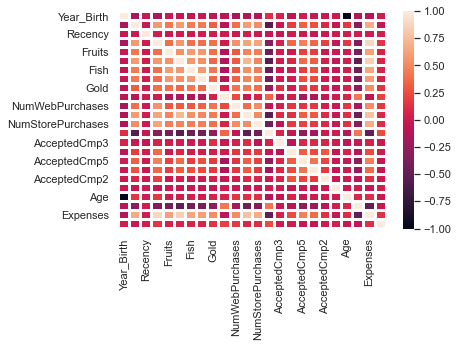

In [109]:
#Now we  will plot the correlation matrix to see the relation between the current features 
#Viewing the heatmap for correlation Matrix
sns.heatmap(data.corr(),linewidths=2)

In [110]:
# Now we will remove the year birth as age gives the importat  details aout the data and Accepted cmp5,Accepted cmp4 , Accepted cmp3, Accepted cmp2, Accepted cmp1
# as it is nnot giving any important insights about the data 

In [111]:
data = data.drop(columns=[
       'Year_Birth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp2','AcceptedCmp1'
       ])

<AxesSubplot:>

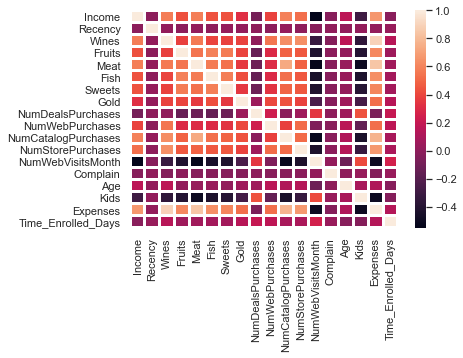

In [112]:
sns.heatmap(data.corr(),linewidths=2)

In [113]:
data.describe()

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Kids,Expenses,Time_Enrolled_Days
count,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000
mean,52236.581563,49.007682,305.153638,26.323995,166.962494,37.635337,27.034794,43.911432,2.325350,4.087664,2.671487,5.805242,5.321735,0.009038,46.082693,0.947582,607.021690,538.214641
std,25178.603047,28.941864,337.305490,39.735932,224.226178,54.763278,41.085433,51.699746,1.924402,2.741664,2.927096,3.250752,2.425092,0.094657,11.700216,0.749297,602.488663,232.522498
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000,5.000000,26.000000
25%,35246.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,38.000000,0.000000,69.000000,366.000000
50%,51373.000000,49.000000,175.000000,8.000000,68.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,45.000000,1.000000,397.000000,539.000000
75%,68487.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,56.000000,1.000000,1048.000000,712.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,75.000000,3.000000,2525.000000,1089.000000


In [114]:
data.dtypes

Education               object
Marital_Status          object
Income                 float64
Recency                  int64
Wines                    int64
Fruits                   int64
Meat                     int64
Fish                     int64
Sweets                   int64
Gold                     int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Complain                 int64
Age                      int64
Kids                     int64
Expenses                 int64
Time_Enrolled_Days       int64
dtype: object

# Data preprocessing 


 we will be converting the Education and Marital status which are into categorical varibale by applying label encoder 
and converting them into Numerical 

In [115]:
#Label Encoding 
#cols=['Education', 'Marital_status']
le = preprocessing.LabelEncoder()
data['Education'] = le.fit_transform(data.Education.values)
data['Marital_Status'] = le.fit_transform(data.Marital_Status.values)
    

In [116]:
data.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Kids,Expenses,Time_Enrolled_Days
0,0,0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,58,0,1617,997
1,0,0,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,61,2,27,151
2,0,1,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,50,0,776,498
3,0,1,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,31,1,53,91
4,1,1,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,34,1,422,347


Now we will be scalling the data 
for scalling we have 2 tehniques 
1. Standard scalling and Min Max scalling 
here we will be using the Standard scalling 

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Kids,Expenses,Time_Enrolled_Days
0,-0.893223,-1.350076,0.234435,0.310773,0.978107,1.552498,1.690807,2.454109,1.484200,0.852974,0.350656,1.427316,2.504247,-0.555456,0.692198,-0.095498,1.018785,-1.264914,1.676723,1.973525
1,-0.893223,-1.350076,-0.234084,-0.380424,-0.872266,-0.637451,-0.718020,-0.650863,-0.633818,-0.733466,-0.169104,-1.126455,-0.571168,-1.170837,-0.132699,-0.095498,1.275248,1.404857,-0.962927,-1.665655
2,-0.893223,0.740699,0.769733,-0.795142,0.358351,0.570796,-0.178264,1.339972,-0.146917,-0.036980,-0.688863,1.427316,-0.229456,1.290688,-0.545148,-0.095498,0.334882,-1.264914,0.280531,-0.172989
3,-0.893223,0.740699,-1.016592,-0.795142,-0.872266,-0.561936,-0.655569,-0.504747,-0.585128,-0.752813,-0.169104,-0.761631,-0.912881,-0.555456,0.279749,-0.095498,-1.289387,0.069971,-0.919763,-1.923752
4,0.572087,0.740699,0.240593,1.554927,-0.391881,0.419766,-0.218411,0.152777,-0.000847,-0.559344,1.390175,0.332842,0.112257,0.059925,-0.132699,-0.095498,-1.032923,0.069971,-0.307165,-0.822535


       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  724  734  679  736  800  295  283  298  296  282
gene2  466  468  468  484  492  558  503  481  506  507
gene3  946  978  951  931  915  387  387  360  344  391
gene4  526  540  541  519  492  752  704  765  713  740
gene5  281  261  266  247  276  878  876  886  870  854
(100, 10)


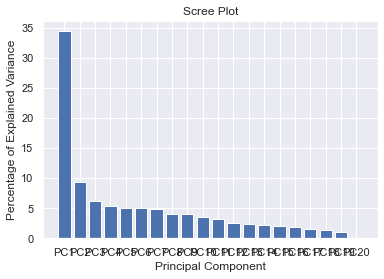

"plt.scatter(pca_df.PC1, pca_df.PC2)\nplt.title('My PCA Graph')\nplt.xlabel('PC1 - {0}%'.format(per_var[0]))\nplt.ylabel('PC2 - {0}%'.format(per_var[1]))"

In [65]:
!pip install factor_analyzer

  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40380 sha256=57190f56350ef5dd02dc8abda443bb6a2c1a0835ce4048a3e9601e2367a31a7b
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\b1\d4\b5\9da0e0e81266e87f5e85068f031077c8a2ae0eedf76ea1d294
Successfully built factor-analyzer


nan

In [117]:
from scipy.stats import zscore
df_num_scaled=data.apply(zscore)
df_num_scaled.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,Kids,Expenses,Time_Enrolled_Days
0,-0.893223,-1.350076,0.234435,0.310773,0.978107,1.552498,1.690807,2.454109,1.484200,0.852974,0.350656,1.427316,2.504247,-0.555456,0.692198,-0.095498,1.018785,-1.264914,1.676723,1.973525
1,-0.893223,-1.350076,-0.234084,-0.380424,-0.872266,-0.637451,-0.718020,-0.650863,-0.633818,-0.733466,-0.169104,-1.126455,-0.571168,-1.170837,-0.132699,-0.095498,1.275248,1.404857,-0.962927,-1.665655
2,-0.893223,0.740699,0.769733,-0.795142,0.358351,0.570796,-0.178264,1.339972,-0.146917,-0.036980,-0.688863,1.427316,-0.229456,1.290688,-0.545148,-0.095498,0.334882,-1.264914,0.280531,-0.172989
3,-0.893223,0.740699,-1.016592,-0.795142,-0.872266,-0.561936,-0.655569,-0.504747,-0.585128,-0.752813,-0.169104,-0.761631,-0.912881,-0.555456,0.279749,-0.095498,-1.289387,0.069971,-0.919763,-1.923752
4,0.572087,0.740699,0.240593,1.554927,-0.391881,0.419766,-0.218411,0.152777,-0.000847,-0.559344,1.390175,0.332842,0.112257,0.059925,-0.132699,-0.095498,-1.032923,0.069971,-0.307165,-0.822535


In [118]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_num_scaled)
p_value

C:\Users\LENOVO\anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:118: RuntimeWarning:

invalid value encountered in log



nan

In [119]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_num_scaled)
kmo_model

C:\Users\LENOVO\anaconda3\lib\site-packages\factor_analyzer\utils.py:248: UserWarning:

The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.



0.8671373422035473

In [120]:
# Step 1- Create the covariance Matrix
cov_matrix = np.cov(df_num_scaled.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00045208e+00  1.92661624e-02 -8.36088349e-02 -2.58095052e-02
  -2.73462325e-02 -8.72267076e-02 -8.70020375e-02 -6.55900509e-02
  -6.38943159e-02 -1.03060518e-01 -8.22806710e-03 -5.05721258e-02
  -5.70062558e-02 -4.91772238e-02  4.20703784e-02 -2.23408248e-02
  -2.41558136e-02 -7.32954871e-03 -7.26046153e-02  2.23589120e-02]
 [ 1.92661624e-02  1.00045208e+00  4.06988058e-03 -7.17910371e-04
  -8.76879105e-03 -2.77891566e-02 -2.48316373e-02 -1.91089886e-02
  -1.70216041e-02 -2.74378220e-02  2.55829233e-02  2.32016717e-03
  -1.11605955e-02  3.28913141e-03  3.21247920e-03  8.53001188e-04
   3.46090110e-03  4.27784888e-02 -2.12356390e-02  2.13165658e-03]
 [-8.36088349e-02  4.06988058e-03  1.00045208e+00 -3.11203615e-03
   5.78742727e-01  4.30442803e-01  5.84625603e-01  4.38720765e-01
   4.40731308e-01  3.25220135e-01 -8.29111616e-02  3.88358096e-01
   5.89356616e-01  5.30359466e-01 -5.52985918e-01 -2.49137483e-02
   1.63368823e-01 -2.93005447e-01  6.67817929e-01 -1

In [121]:
# Step 2- Get eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [ 6.87738841e+00  1.88705904e+00  1.23203389e+00  1.06030159e+00
  9.84201972e-01  1.00683664e+00  9.97344845e-01  8.24080060e-01
  8.14108621e-01  7.16430431e-01  6.32581030e-01  2.24021767e-01
  2.52278309e-01  2.99227766e-01  5.23744086e-01  4.63011547e-01
  4.35261167e-01  3.93690289e-01  3.85440138e-01 -5.31773952e-17]


Eigen Vectors 
 %s [[ 3.69852315e-02 -2.10752905e-02 -7.43938857e-02 -7.34109056e-01
  -4.54601683e-01  2.18748284e-01  1.13672258e-01  3.83525269e-01
  -1.40847791e-01  3.11673538e-02 -9.58741844e-02 -2.85854359e-02
   4.19825794e-02  5.28283510e-03 -9.15947867e-03 -7.02365824e-02
   3.36804399e-02  2.06340904e-02  4.97037778e-03  3.34215644e-17]
 [ 9.24135195e-03  3.52674961e-02  1.15339716e-01 -2.46653997e-01
   6.46105815e-01  6.95641531e-01 -6.76287598e-02 -3.22266291e-02
   1.06815301e-01  5.66599289e-02 -2.63052160e-02  9.52101093e-04
   7.20866395e-03  1.09804907e-02  4.17735088e-02  3.57729376e-03
   1.12173282e-02  1.09584167e-02 -7.6

In [122]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 34.37140342  43.80243504  49.95982086  55.25893319  60.29084155
  65.2753124   70.19409858  74.31263697  78.3813407   81.96187417
  85.12335008  87.74088717  90.05489879  92.23022121  94.19778316
  96.124113    97.61957576  98.88039732 100.         100.        ]


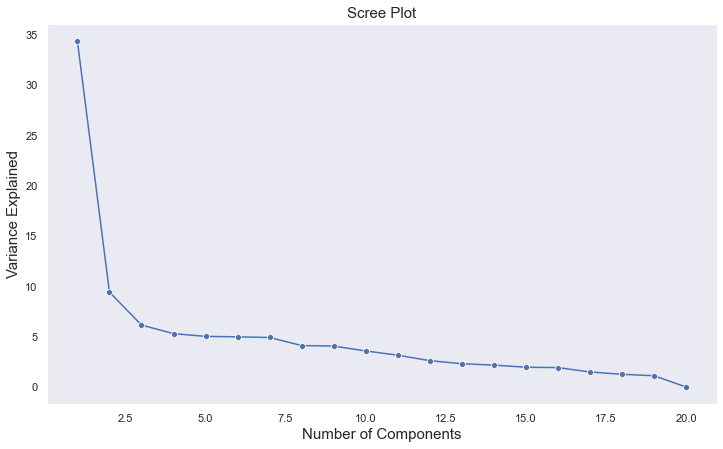

In [123]:
# Step 3 View Scree Plot to identify the number of components to be built
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [124]:
# Step 4 Apply PCA for the number of decided components to get the loadings and component output

# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
# NOTE - we are generating only 4 PCA dimensions (dimensionality reduction from 30  to 4)
pca = PCA(n_components=4, random_state=123)
df_pca = pca.fit_transform(df_num_scaled)
df_pca.transpose() # Component output

array([[ 4.37766098, -2.54860641,  1.90824372, ...,  1.68088352,
         1.80303345, -2.03062267],
       [ 1.2743263 , -0.91479493, -0.25047479, ..., -0.77911176,
         0.00782611,  1.20788737],
       [-1.80977389,  2.04413902,  0.382605  , ..., -0.24996797,
         1.6353806 ,  0.63477698],
       [ 1.12030307,  1.16577103, -0.1295709 , ...,  0.88546639,
        -1.2082385 , -0.58698253]])

In [126]:
# Loading of each feature on the components
pca.components_

array([[-0.03698523, -0.00924135,  0.28078999,  0.0065403 ,  0.29506854,
         0.26852404,  0.31504505,  0.27849115,  0.26779299,  0.21992133,
        -0.04811711,  0.20782128,  0.31262725,  0.28077393, -0.23942292,
        -0.0130111 ,  0.05089419, -0.22007654,  0.362601  ,  0.0391199 ],
       [-0.02106269,  0.03526915, -0.00379389,  0.0191357 ,  0.20082091,
        -0.08967896, -0.08860262, -0.0956252 , -0.07347952,  0.16081449,
         0.56755589,  0.40588324,  0.02348942,  0.16020909,  0.35545134,
         0.02143555,  0.1682959 ,  0.31414005,  0.07363769,  0.3591527 ],
       [-0.07462896,  0.11526242,  0.26900002,  0.00263624,  0.09997204,
        -0.17064101, -0.03724501, -0.16362586, -0.15668589, -0.14789331,
         0.04698485,  0.03495328,  0.05111626,  0.10516574, -0.28891078,
        -0.06410679,  0.59981158,  0.26108831, -0.00739435, -0.51225386],
       [-0.73350992, -0.24626544, -0.01750095,  0.39850744, -0.14593276,
         0.11120718,  0.00461471,  0.07412487,  

The first thing we would be doing is to calculate the  percentage of variation that eac principal component accounts for.

In [132]:
per_var=np.round(pca.explained_variance_ratio_,decimals=1)

In [133]:
per_var


array([0.3, 0.1, 0.1, 0.1])

In [ ]:
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
